In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Input, LeakyReLU, ReLU 
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import numpy as np
import time
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
X = np.load('features_std.npy')/255
y = np.load('labels_std.npy')
print(X.shape)
print(y.shape)
X_test = np.load('test_features_.npy')/255
y_test = np.load('test_labels_.npy')
print(X_test.shape)
print(y_test.shape)

(39209, 48, 48, 3)
(39209, 43)
(12630, 48, 48, 3)
(12630, 43)


In [3]:
# concatenate train and test set
print
X = np.concatenate((X,X_test), axis=0)
print(X.shape)
y = np.concatenate((y,y_test), axis=0)
print(y.shape)


(51839, 48, 48, 3)
(51839, 43)


In [4]:
# first split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=22)
X = 0
y = 0

In [5]:
np.save('train_data', X_train)
np.save('train_labels', y_train)
np.save('test_data', X_test)
np.save('test_labels', y_test)

In [ ]:
print(X_test.shape)

In [8]:
# split test set into real test set and small validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.08, random_state=10)

In [9]:
np.save('train_data', X_train)
np.save('train_labels', y_train)
np.save('val_data', X_val)
np.save('val_labels', y_val)
#np.save('test_data', X_test)
#np.save('test_labels', y_test)

In [2]:
X_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')
X_test = np.load("test_data.npy")
y_test = np.load('test_labels.npy')
X_val = np.load('val_data.npy')
y_val = np.load('val_labels.npy')

In [ ]:
X_aug_train = np.concatenate((np.load('train_data_augmented_reproduce_class.npy'),np.load('train_data.npy')), axis=0)
y_aug_train = np.concatenate((np.load('train_labels_augmented_reproduce_class.npy'), np.load('train_labels.npy')), axis=0)




In [ ]:
# split test set into real test set and small validation set
X_train, X_aug_val, y_aug_train, y_aug_val = train_test_split(X_train, y_train, test_size=0.08, random_state=10)

In [2]:
X_train = np.load('train_data_augmented_500_per_class+train_data.npy')
y_train = np.load('train_labels_augmented_500_per_class+train_labels.npy')
X_val = np.load('val_data_augmented_500_per_class+train_data.npy')
y_val = np.load('val_labels_augmented_500_per_class+train_labels.npy')

In [8]:
print(X_train[10335][0,0,0])

0.13725490196078433


In [19]:
NAME = "CNN_16_96_128_epochs_3_relu_RMSprop_categorical_crossentropy_padding_same_augmented_fresh_trained_500_class+train"

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [20]:
inputs = Input(shape=(X_train.shape[1],X_train.shape[2], 3))

x = Conv2D(16, (3,3), padding="same")(inputs)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
block_1_output = Dropout(0)(x)


x = Conv2D(96, (3,3), padding="same")(block_1_output)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
block_2_output = Dropout(0)(x)

x = Conv2D(128, (3,3), padding="same")(block_2_output)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
block_3_output = Dropout(0)(x)

#x = Conv2D(128, (3,3), padding="same", activation='relu')(block_3_output)
#x = MaxPooling2D(pool_size=(2,2))(x)
#block_4_output = Dropout(0)(x)

x = Flatten()(block_3_output)
x = Dense(256)(x)
x = ReLU()(x)
#x = Dense(128, activation='relu')(x)

prediction = Dense(y_train.shape[1], activation='softmax')(x)
#prediction = Dense(17, activation='softmax')(x)
model_1 = Model(inputs=inputs, outputs=prediction)


In [21]:
model_1.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [22]:
n_epochs = 5
status = model_1.fit(X_train, y_train, batch_size=64, epochs=n_epochs, validation_data=(X_val,y_val), callbacks=[tensorboard])


path = 'Optimization Results/'+NAME

model_1.save(path)
results = np.zeros((3,n_epochs))
results[0::] = (np.array(status.epoch)+1)
results[1::] = np.array(status.history['val_loss'])
results[2::] = np.array(status.history['val_accuracy'])
#np.save(path, results)

Train on 55383 samples, validate on 4816 samples
Epoch 1/5
55383/55383 [==============================] - 11s 194us/step - loss: 1.1365 - accuracy: 0.6679 - val_loss: 0.5524 - val_accuracy: 0.8299
Epoch 2/5
55383/55383 [==============================] - 11s 192us/step - loss: 0.1779 - accuracy: 0.9457 - val_loss: 0.1271 - val_accuracy: 0.9620
Epoch 3/5
55383/55383 [==============================] - 11s 190us/step - loss: 0.0723 - accuracy: 0.9783 - val_loss: 0.0803 - val_accuracy: 0.9745
Epoch 4/5
55383/55383 [==============================] - 11s 190us/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.1063 - val_accuracy: 0.9753
Epoch 5/5
55383/55383 [==============================] - 11s 190us/step - loss: 0.0297 - accuracy: 0.9914 - val_loss: 0.0663 - val_accuracy: 0.9819


In [49]:
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 9351), started 0:19:00 ago. (Use '!kill 9351' to kill it.)

In [35]:
score = model_1.evaluate(X_test, y_test, verbose = 0) 
print(X_test.shape)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

(11923, 48, 48, 3)
Test loss: 0.03678021636652401
Test accuracy: 0.9932063817977905


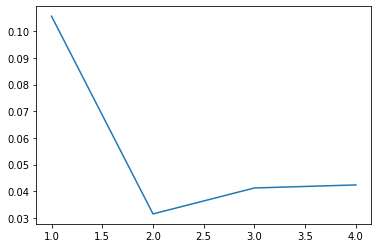

In [19]:
plt.plot((np.array(status.epoch)+1).astype('uint8'), status.history['val_loss'])

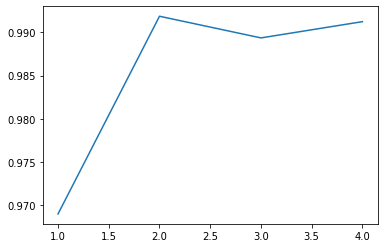

In [18]:
plt.plot(np.array(status.epoch)+1, status.history['val_accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.08)
#valid_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    directory="New_Augmented_Images/",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=64,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
#valid_generator = valid_datagen.flow_from_directory(
    #directory="New_Augmented_Images/",
    #target_size=(48, 48),
    #color_mode="rgb",
    #batch_size=64,
    #class_mode="categorical",
    #shuffle=True,
    #seed=42
#)

Found 108131 images belonging to 43 classes.


In [15]:
model_1.fit(train_generator,
          steps_per_epoch=108131/64, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
1690/1689 [==============================] - 33s 20ms/step - loss: 0.0229 - accuracy: 0.9940 - val_loss: 80.9163 - val_accuracy: 0.0542
Epoch 2/10
1690/1689 [==============================] - 31s 18ms/step - loss: 0.0223 - accuracy: 0.9945 - val_loss: 92.0015 - val_accuracy: 0.0542
Epoch 3/10
 661/1689 [==========>...................] - ETA: 14s - loss: 0.0218 - accuracy: 0.9952

KeyboardInterrupt: 

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model_1.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5
)

Epoch 1/5


In [10]:
model_1.fit(datagen.flow_from_directory(directory='New_Augmented_Images/', target_size=48, batch_size=64), batch_size=64, epochs=n_epochs, validation_data=(X_val,y_val), callbacks=[tensorboard])

TypeError: 'int' object is not iterable